In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

First Dataset Experiments and Best Practices:

Get an better understanding of what yfinance data is

1. Always use head, info and describe to get a view of the data
2. You can sort by both index and values, use the information from point 1 to make your decisions

In [4]:
tickers = ['SPY', 'AAPL', 'JPM', 'GLD', 'TLT', 'BTC-USD']

fin_data = yf.download(tickers, start="2023-01-01", end="2026-01-01")

[*********************100%***********************]  6 of 6 completed


In [5]:
fin_data.columns

MultiIndex([( 'Close',    'AAPL'),
            ( 'Close', 'BTC-USD'),
            ( 'Close',     'GLD'),
            ( 'Close',     'JPM'),
            ( 'Close',     'SPY'),
            ( 'Close',     'TLT'),
            (  'High',    'AAPL'),
            (  'High', 'BTC-USD'),
            (  'High',     'GLD'),
            (  'High',     'JPM'),
            (  'High',     'SPY'),
            (  'High',     'TLT'),
            (   'Low',    'AAPL'),
            (   'Low', 'BTC-USD'),
            (   'Low',     'GLD'),
            (   'Low',     'JPM'),
            (   'Low',     'SPY'),
            (   'Low',     'TLT'),
            (  'Open',    'AAPL'),
            (  'Open', 'BTC-USD'),
            (  'Open',     'GLD'),
            (  'Open',     'JPM'),
            (  'Open',     'SPY'),
            (  'Open',     'TLT'),
            ('Volume',    'AAPL'),
            ('Volume', 'BTC-USD'),
            ('Volume',     'GLD'),
            ('Volume',     'JPM'),
            ('Volume

Above is an example of where the data is MultiIndexxed so you would need to flatten it first.


Below is selecting just the close data for each of the tickers we've selected

In [7]:
fin_data_close = fin_data['Close']

In [8]:
fin_data_close.head()

Ticker,AAPL,BTC-USD,GLD,JPM,SPY,TLT
Date,,,,,,
2023-01-01,NaN,16625.080078,NaN,NaN,NaN,NaN
2023-01-02,NaN,16688.470703,NaN,NaN,NaN,NaN
2023-01-03,123.096031,16679.857422,171.059998,124.928673,366.069061,89.827629
2023-01-04,124.365662,16863.238281,172.669998,126.093643,368.895203,91.058228
2023-01-05,123.046814,16836.736328,170.520004,126.065720,364.684753,91.438950


In [9]:
fin_data_close.shape

(1096, 6)

In [10]:
fin_data_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2023-01-01 to 2025-12-31
Freq: D
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AAPL     752 non-null    float64
 1   BTC-USD  1096 non-null   float64
 2   GLD      752 non-null    float64
 3   JPM      752 non-null    float64
 4   SPY      752 non-null    float64
 5   TLT      752 non-null    float64
dtypes: float64(6)
memory usage: 59.9 KB


In [11]:
fin_data_close.describe()

Ticker,AAPL,BTC-USD,GLD,JPM,SPY,TLT
count,752.000000,1096.000000,752.000000,752.000000,752.000000,752.000000
mean,202.528695,65488.929009,239.770452,203.560457,520.212328,87.267706
std,34.369587,31817.509383,64.193333,61.534259,91.087731,4.020465
min,123.046814,16625.080078,168.350006,116.341858,364.684753,75.086792
25%,175.848904,30317.710938,184.112495,140.770737,431.971329,84.643162
50%,197.658516,64148.892578,220.590004,195.176239,524.992950,87.029564
75%,226.817123,95541.947266,284.389999,254.310448,589.842361,90.097729
max,285.922455,124752.531250,416.739990,327.691864,690.380005,96.816444


In [12]:
close_data_sorted = fin_data_close.sort_index(ascending=False)

In [13]:
close_data_sorted.head()

Ticker,AAPL,BTC-USD,GLD,JPM,SPY,TLT
Date,,,,,,
2025-12-31,271.605835,87508.828125,396.309998,320.773071,681.919983,86.827888
2025-12-30,272.824707,88430.132812,398.890015,321.967712,687.010010,87.525215
2025-12-29,273.504089,87138.140625,398.600006,322.296204,687.849976,87.734421
2025-12-28,NaN,87835.835938,NaN,NaN,NaN,NaN
2025-12-27,NaN,87802.156250,NaN,NaN,NaN,NaN


What Questions do I want to answer?

1. Look at how the value of the stock has changed over time?
2. The correlation between stock performance and gold prices?
3. Overlay two different stocks on the same plot.
5. Why are we using the close prices?

In [15]:
print(close_data_sorted.columns)

Index(['AAPL', 'BTC-USD', 'GLD', 'JPM', 'SPY', 'TLT'], dtype='object', name='Ticker')


In [16]:
close_data_sorted['AAPL'].mean()

202.5286953398522

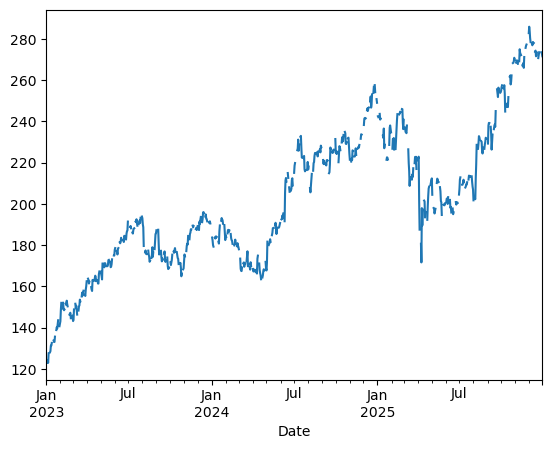

In [41]:
close_data_sorted['AAPL'].plot()
plt.show()

# You can see that there are a lot of gaps, lets see the number of NAs in the data

In [47]:
close_data_sorted['AAPL'].count()

752

In [51]:
close_data_sorted['AAPL'].isna().sum()

344

In [68]:
apple_clean = close_data_sorted['AAPL'].dropna()

In [72]:
apple_clean.isna().sum()

0

Is it always best to just drop NAs or is it also better to smooth the data over but forward filling?

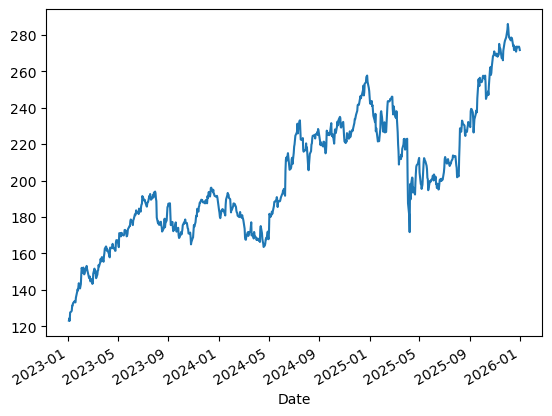

In [66]:
apple_clean.plot()
plt.show()